## Гавриков Арсений Симонович МСКМ201.

# Simple iteration for systems of linear equations

First, generate a random diagonally dominant matrix, for testing.

In [54]:
import numpy as np
import copy
rndm = np.random.RandomState(1234)

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)

# I.  Jacobi iteration

Given

$$
A x = b
$$

separate the diagonal part $D$,

$$ A = D + (A - D) $$

and write

$$
x = D^{-1} (D - A) x + D^{-1} b\;.
$$

Then iterate

$$
x_{n + 1} = B x_{n} + c\;,
$$

where 

$$
B = D^{-1} (A - D) \qquad \text{and} \qquad c = D^{-1} b
$$


Let's construct the matrix and the r.h.s. for the Jacobi iteration

In [55]:
diag_1d = np.diag(A)

B = -A.copy()
np.fill_diagonal(B, 0)

D = np.diag(diag_1d)
invD = np.diag(1./diag_1d)
BB = invD @ B 
c = invD @ b

In [56]:
# sanity checks
from numpy.testing import assert_allclose

assert_allclose(-B + D, A)


# xx is a "ground truth" solution, compute it using a direct method
xx = np.linalg.solve(A, b)

np.testing.assert_allclose(A@xx, b)
np.testing.assert_allclose(D@xx, B@xx + b)
np.testing.assert_allclose(xx, BB@xx + c)

Check that $\| B\| \leqslant 1$:

In [57]:
np.linalg.norm(BB)

0.36436161983015336

### Do the Jacobi iteration

In [6]:
n_iter = 50

x0 = np.ones(n)
x = x0
for _ in range(n_iter):
    x = BB @ x + c

In [7]:
# Check the result:

A @ x - b

array([ 1.11022302e-16,  0.00000000e+00, -2.22044605e-16, -1.11022302e-16,
        1.11022302e-16,  0.00000000e+00, -2.08166817e-17,  0.00000000e+00,
       -2.77555756e-17,  1.11022302e-16])

### Task I.1

Collect the proof-of-concept above into a single function implementing the Jacobi iteration. This function should receive the r.h.s. matrix $A$, the l.h.s. vector `b`, and the number of iterations to perform.


The matrix $A$ in the illustration above is strongly diagonally dominant, by construction. 
What happens if the diagonal matrix elements of $A$ are made smaller? Check the convergence of the Jacobi iteration, and check the value of the norm of $B$.

(20% of the total grade)


In [50]:
# ... ENTER YOUR CODE HERE ...

def Jacobi_iteration(A, b, n_iter = 50):
    
    diag_1d = np.diag(A)
    B = -A.copy()
    np.fill_diagonal(B, 0)
    invD = np.diag(1./diag_1d)
    BB = invD @ B 
    c = invD @ b
    
    print('Norm of B = ', np.linalg.norm(BB))
    
    x = np.ones(n)
    for _ in range(n_iter):
        x = BB @ x + c
    return x

In [51]:
import numpy as np
rndm = np.random.RandomState(22)

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)

In [53]:
x = Jacobi_iteration(A, b)
xx = np.linalg.solve(A, b)

np.testing.assert_allclose(A@x, b)
np.testing.assert_allclose(x, xx)

Norm of B =  0.3584322225360458


In [54]:
xx

array([ 0.02333641,  0.04928203,  0.01082   ,  0.00131153,  0.05163275,
        0.02934795,  0.04510599, -0.0083918 ,  0.03656276,  0.03999124])

In [55]:
x

array([ 0.02333641,  0.04928203,  0.01082   ,  0.00131153,  0.05163275,
        0.02934795,  0.04510599, -0.0083918 ,  0.03656276,  0.03999124])

Если уменьшить диагональные элементы, то решение рассходится:

In [56]:
import numpy as np
rndm = np.random.RandomState(5)

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([5]*n)
b = rndm.uniform(size=n)

In [57]:
x = Jacobi_iteration(A, b)
xx = np.linalg.solve(A, b)

np.testing.assert_allclose(A@x, b)
np.testing.assert_allclose(x, xx)

Norm of B =  1.0487824611404155


AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0

Mismatched elements: 10 / 10 (100%)
Max absolute difference: 0.0022179
Max relative difference: 0.02760913
 x: array([0.986975, 0.802959, 0.055452, 0.191847, 0.454637, 0.704713,
       0.334141, 0.361697, 0.923085, 0.955458])
 y: array([0.985137, 0.801402, 0.053962, 0.190478, 0.452419, 0.702942,
       0.332048, 0.359983, 0.921471, 0.953631])

Норма В больше  единицы: $\| B\| > 1$:

In [58]:
xx

array([ 0.15051838,  0.10379546, -0.04916982, -0.01200386,  0.03188015,
        0.0635203 , -0.00156331,  0.01791005,  0.14294984,  0.1331768 ])

In [59]:
x

array([ 0.15070948,  0.10394278, -0.04901679, -0.0118753 ,  0.03212083,
        0.06370336, -0.00135137,  0.01807938,  0.14311296,  0.13336007])

# II. Seidel's iteration.

##### Task II.1

Implement the Seidel's iteration. 

Test it on a random matrix. Study the convergence of iterations, relate to the norm of the iteration matrix.

(30% of the total grade)

algorithm source: https://en.wikipedia.org/wiki/Gauss%E2%80%93Seidel_method

In [101]:
# ... ENTER YOUR CODE HERE ...

def seidel_iteration(A, b, n_iter = 50):
    
    A_ = copy.deepcopy(A)
    size = b.shape[0]
    x = np.ones(size)
    
    for _ in range(n_iter):
        for k in range(size):
              x[k] = (b[k]-np.dot(A_[k][:k], x[:k]) - np.dot(A_[k][k+1:], x[k+1:])) / A_[k,k]
                
    return x

In [102]:
import numpy as np
rndm = np.random.RandomState(22)
n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)

x = seidel_iteration(A, b)
xx = np.linalg.solve(A, b)

np.testing.assert_allclose(A@x, b)
np.testing.assert_allclose(x, xx)

In [103]:
x = seidel_iteration(A, b)
xx = np.linalg.solve(A, b)

np.testing.assert_allclose(A@x, b)
np.testing.assert_allclose(x, xx)

In [104]:
xx

array([ 0.02333641,  0.04928203,  0.01082   ,  0.00131153,  0.05163275,
        0.02934795,  0.04510599, -0.0083918 ,  0.03656276,  0.03999124])

In [105]:
x

array([ 0.02333641,  0.04928203,  0.01082   ,  0.00131153,  0.05163275,
        0.02934795,  0.04510599, -0.0083918 ,  0.03656276,  0.03999124])

Решение расходится когда diagflat имеет параметр 1.

In [113]:
import numpy as np
rndm = np.random.RandomState(22)
n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([1]*n)
b = rndm.uniform(size=n)

x = seidel_iteration(A, b)
xx = np.linalg.solve(A, b)

np.testing.assert_allclose(A@x, b)
np.testing.assert_allclose(x, xx)

AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0

Mismatched elements: 9 / 10 (90%)
Max absolute difference: 3497.61684492
Max relative difference: 9581.43775885
 x: array([-1.895500e+03, -3.496766e+03, -1.020331e+03,  1.789302e+02,
       -4.259235e+02, -3.143683e+01, -6.673311e+01,  2.753286e+02,
        1.569225e+01,  7.629959e-01])
 y: array([0.450042, 0.851211, 0.362417, 0.202428, 0.872189, 0.602708,
       0.831853, 0.028733, 0.704297, 0.762996])

# III. Minimum residual scheme

1. Compute $\textbf{r}_{n} = \textbf{A}\textbf{x}_n − \textbf{b}$

2. Compute $$ \tau_{n+1} = \frac{(\textbf{r}_n \cdot \textbf{A}\textbf{r}_n)}{||\textbf{A}\textbf{r}_n||}$$

3. Compute $\textbf{x}_{n+1} = \textbf{x}_{n} − \tau_{n+1} \cdot r_{n}$

### Task III.1

Implement the $\textit{minimum residual}$ scheme: an explicit non-stationary method, where at each step you select the iteration parameter $\tau_n$ to minimize the residual $\mathbf{r}_{n+1}$ given $\mathbf{r}_n$. Test it on a random matrix, study the convergence to the solution, in terms of the norm of the residual and the deviation from the ground truth solution (which you can obtain using a direct method). Study how the iteration parameter $\tau_n$ changes as iterations progress.

(50% of the grade)

In [243]:
# ... ENTER YOUR CODE HERE ...

def minimum_residual_scheme(A, b, n_iter = 75):
    x = np.ones(b.shape[0])
    
    rs = []
    ks = []
    
    for _ in range(n_iter):
        r = A @ x - b
        k = np.dot(r, A @ r) / np.linalg.norm(A @ r)**2
        x = x - k*r
        
        rs.append(np.linalg.norm(r))
        ks.append(k)

        
    return x, rs, ks

In [244]:
import numpy as np
rndm = np.random.RandomState(55)

n = 15
A = rndm.uniform(size=(n, n)) + np.diagflat([7]*n)
b = rndm.uniform(size=n)

In [245]:
x = minimum_residual_scheme(A, b)[0]
xx = np.linalg.solve(A, b)

np.testing.assert_allclose(A@x, b)
np.testing.assert_allclose(x, xx)

In [246]:
x

array([ 0.0116771 ,  0.02033345,  0.0446074 ,  0.01617477,  0.0619498 ,
        0.0627579 , -0.03492717,  0.02051364, -0.03718965,  0.0661994 ,
        0.07545246,  0.09856229,  0.02103911,  0.04218267,  0.07122538])

In [247]:
xx

array([ 0.0116771 ,  0.02033345,  0.0446074 ,  0.01617477,  0.0619498 ,
        0.0627579 , -0.03492717,  0.02051364, -0.03718965,  0.0661994 ,
        0.07545246,  0.09856229,  0.02103911,  0.04218267,  0.07122538])

Таким образом, мы видим, как норма остатков стремится к нулю - решение сходится.

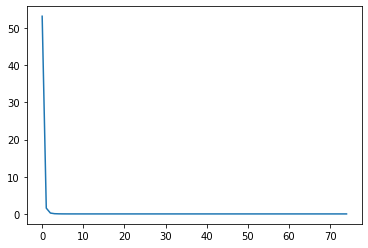

In [248]:
import matplotlib.pyplot as plt

residual_norm = minimum_residual_scheme(A, b)[1]

plt.plot(residual_norm)

Поведение параметра итераций довольно интересное - сначала периодическое, затем выходящее на некоторое "насыщение"

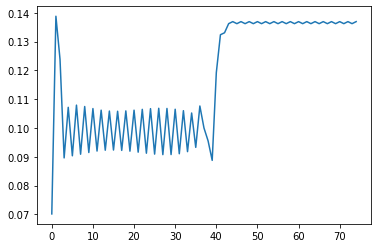

In [249]:
iter_param = minimum_residual_scheme(A, b)[2]

plt.plot(iter_param)